## MNIST Handwritten Digit Clasification using Deep Learning (Neural Network)

Importing Dependencies

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import cv2 #computer vision
from PIL import Image 
import tensorflow as tf
tf.random.set_seed(3)
from tensorflow import keras
from keras.datasets import mnist
from tensorflow.math import confusion_matrix

Loading the MNIST data from keras.datasets

In [2]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [3]:
type(X_train)

numpy.ndarray

In [4]:
# shape of the numpy arrays

print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(60000, 28, 28) (60000,) (10000, 28, 28) (10000,)


Training data = 60,000 Images

Test data = 10,000 Images

Image dimension --> 28 x 28

Grayscale Image --> 1 channel

In [5]:
# printing the 11th image

print(X_train[10])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0  42 118 219 166 118 118   6
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0 103 242 254 254 254 254 254  66
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0  18 232 254 254 254 254 254 238
   70   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0 104 244 254 224 254 254 254
  141   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0 207 254 210 25

In [6]:
print(X_train[10].shape)

(28, 28)


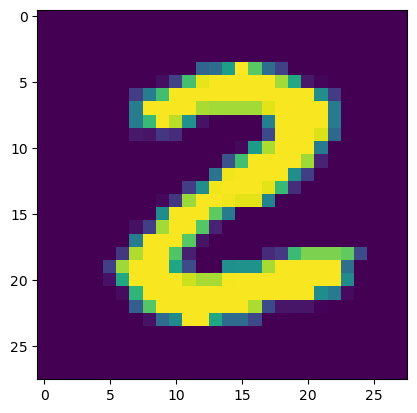

class label of this image: 2


In [7]:
# displaying the image

plt.imshow(X_train[25])
plt.show()

# print the corresponding label
print('class label of this image: ' + str(y_train[25]))

Image Lables

In [8]:
print(y_train.shape, y_test.shape)

(60000,) (10000,)


In [9]:
# unique values in y_train

print(np.unique(y_train))

# unique values in y _test

print(np.unique(y_test))

[0 1 2 3 4 5 6 7 8 9]
[0 1 2 3 4 5 6 7 8 9]


We can use these labels as such or we can also apply One Hot Encoding

All the images have the same dimensions in this dataset, If not, we have to resize all the images to a common dimension

In [10]:
# scaling the pixel values (Pixel values range from 0 to 255)

X_train = X_train/255
X_test = X_test/255

In [11]:
# printing the 11th image to check the scaling

print(X_train[11])

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.    

Building the Neural Network

In [12]:
# setting up the layers of the Neural Network

model = keras.Sequential([
    keras.layers.Flatten(input_shape = (28, 28)),
    keras.layers.Dense(50, activation = 'relu'),
    keras.layers.Dense(50, activation = 'relu'),
    keras.layers.Dense(10, activation = 'sigmoid')
])

In [13]:
# compiling the Neural Network

model.compile(optimizer = 'adam',
             loss = 'sparse_categorical_crossentropy',
             metrics = ['accuracy'])


In [14]:
# training the Neural Network

model.fit(X_train, y_train, epochs = 10)

Epoch 1/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.2964 - accuracy: 0.9135
Epoch 2/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.1464 - accuracy: 0.9555
Epoch 3/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.1107 - accuracy: 0.9657
Epoch 4/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0910 - accuracy: 0.9721
Epoch 5/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0743 - accuracy: 0.9770
Epoch 6/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0659 - accuracy: 0.9792
Epoch 7/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0583 - accuracy: 0.9818
Epoch 8/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0514 - accuracy: 0.9834
Epoch 9/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0464 - accuracy: 0.9849
Epoch 10/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.040

Training data accuracy = 98.77%

### Accuracy on Test data:

In [15]:
loss, accuracy = model.evaluate(X_test , y_test)
print(accuracy)

313/313 [==============================] - 0s 808us/step - loss: 0.1081 - accuracy: 0.9694
0.9693999886512756


Test data accuracy = 96.93%

In [16]:
print(X_test.shape)

(10000, 28, 28)


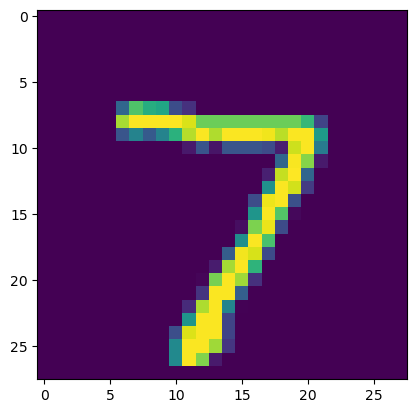

In [17]:
# first data point in X_test

plt.imshow(X_test[0])
plt.show()

In [18]:
print(y_test[0])

7


In [19]:
y_pred = model.predict(X_test)

313/313 [==============================] - 0s 719us/step


In [20]:
print(y_pred.shape)

(10000, 10)


In [21]:
print(y_pred[0])

[9.5903022e-05 4.3665528e-05 7.2290069e-01 3.2594296e-01 1.1151884e-09
 4.2232457e-03 1.1676272e-08 9.9999815e-01 4.3657096e-03 1.0916661e-01]


#### model.predict() gives the prediction probability of each class for that data point

In [22]:
# converting the prediction probabilities to class label

label_for_first_test_image = np.argmax(y_pred[0])
print(label_for_first_test_image)

7


The argmax function is used to find the index of the maximum element in an array or sequence. In other words, it returns the position of the largest value in the input array.

In [23]:
# converting the prediction probabilities to class label for all test data points

y_pred_labels = [np.argmax(i) for i in y_pred]
print(y_pred_labels)

[7, 2, 1, 0, 4, 1, 4, 9, 5, 9, 0, 6, 9, 0, 1, 5, 9, 7, 3, 4, 9, 6, 6, 5, 4, 0, 7, 4, 0, 1, 3, 1, 3, 4, 7, 2, 7, 1, 2, 1, 1, 7, 4, 2, 3, 5, 1, 2, 4, 4, 6, 3, 5, 5, 6, 0, 4, 1, 9, 5, 7, 8, 9, 3, 7, 4, 6, 4, 3, 0, 7, 0, 2, 9, 1, 7, 3, 2, 9, 7, 7, 6, 2, 7, 8, 4, 7, 3, 6, 1, 3, 6, 9, 3, 1, 4, 1, 7, 6, 9, 6, 0, 5, 4, 5, 9, 2, 1, 9, 4, 8, 7, 3, 9, 7, 4, 4, 4, 9, 2, 5, 4, 7, 6, 7, 9, 0, 5, 8, 5, 6, 6, 5, 7, 8, 1, 0, 1, 6, 4, 6, 7, 3, 1, 7, 1, 8, 2, 0, 9, 9, 9, 5, 5, 1, 5, 6, 0, 2, 4, 4, 6, 5, 4, 6, 5, 4, 5, 1, 4, 4, 7, 2, 3, 2, 7, 1, 8, 1, 8, 1, 8, 5, 0, 8, 9, 2, 5, 0, 1, 1, 1, 0, 9, 0, 3, 1, 6, 4, 2, 3, 6, 1, 1, 1, 3, 9, 5, 2, 9, 4, 5, 9, 3, 9, 0, 3, 6, 5, 5, 7, 2, 2, 7, 1, 2, 8, 4, 1, 7, 3, 3, 8, 8, 7, 7, 2, 2, 4, 1, 5, 9, 8, 7, 2, 3, 0, 2, 4, 2, 4, 1, 9, 5, 7, 7, 2, 8, 2, 6, 8, 5, 7, 7, 9, 1, 8, 1, 8, 0, 3, 0, 1, 9, 9, 4, 1, 8, 2, 1, 2, 9, 7, 5, 9, 2, 6, 4, 1, 5, 8, 2, 9, 2, 0, 4, 0, 0, 2, 8, 4, 7, 1, 2, 4, 0, 2, 7, 4, 3, 3, 0, 0, 3, 1, 8, 6, 5, 2, 5, 1, 7, 9, 3, 0, 4, 2, 0, 7, 1, 1, 2, 1, 

y_test --> True labels

y_pred_labels --> Predicted Labels

### Confusion Matrix

In [24]:
conf_mat = confusion_matrix(y_test, y_pred_labels)

In [25]:
print(conf_mat)

tf.Tensor(
[[ 958    0    0    1    1    9    3    5    3    0]
 [   0 1124    4    0    0    3    1    1    2    0]
 [   3    2 1004    4    2    1    3    6    6    1]
 [   0    0    8  965    0   16    0    8    6    7]
 [   0    0    5    0  952    2    5    2    3   13]
 [   2    0    0    5    0  876    3    1    4    1]
 [   3    4    3    1    6    7  926    2    6    0]
 [   1   10    9    1    0    0    0  999    4    4]
 [   3    0    4    8    4    9    1    6  938    1]
 [   4    3    0    5    7    6    0   24    8  952]], shape=(10, 10), dtype=int32)


Text(0.5, 47.7222222222222, 'Predicted Labels')

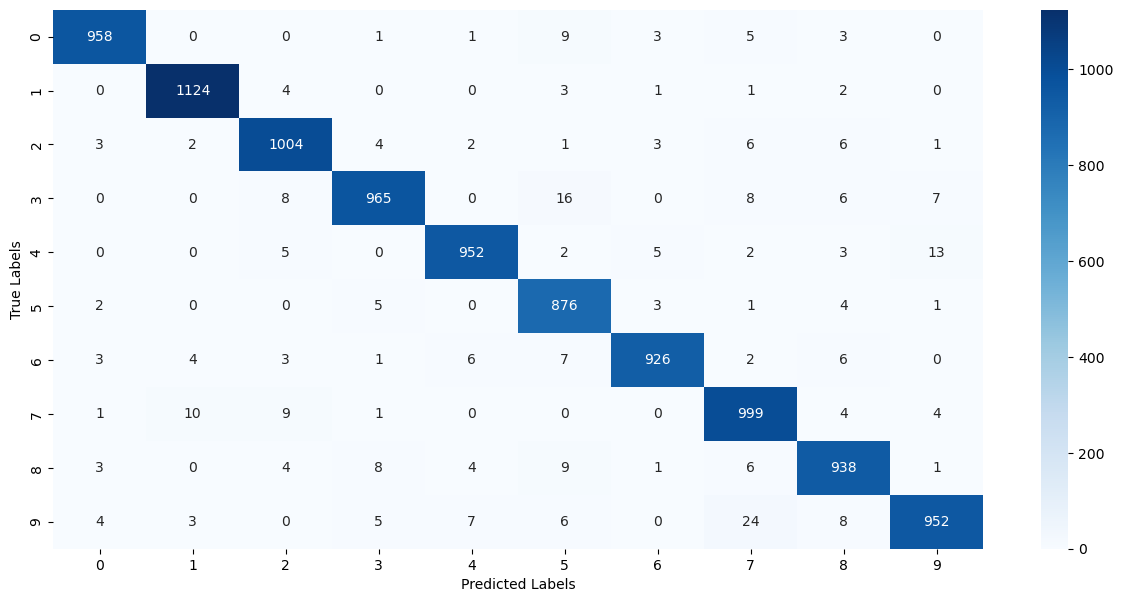

In [26]:
plt.figure(figsize = (15,7))
sns.heatmap(conf_mat, annot=True, fmt = 'd', cmap='Blues')
plt.ylabel('True Labels')
plt.xlabel('Predicted Labels')

### Building a Predictive System

In [48]:
input_image_path = r'E:\PROJECTS\DL project\2. MNIST Digit Classification with Neural Network\MNIST-Handwritten-Digit-Classification-using-Deep-Learning\MNIST_digit.png'

In [45]:
# input_image_path = input('Path of the image to be predicted: ')

Path of the image to be predicted: input_image_path = input('Path of the image to be predicted: ')


In [49]:
input_image = cv2.imread(input_image_path)

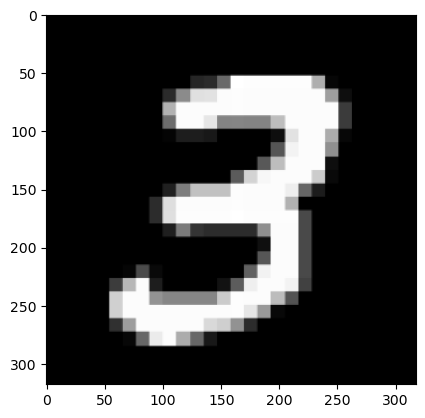

In [50]:
plt.imshow(input_image)
plt.show()

In [51]:
type(input_image)

numpy.ndarray

In [52]:
# print(input_image)

In [53]:
input_image.shape

(318, 318, 3)

In [54]:
grayScale = cv2.cvtColor(input_image, cv2.COLOR_RGB2GRAY)

In [55]:
grayScale.shape

(318, 318)

In [56]:
image_resize = cv2.resize(grayScale, (28,28))

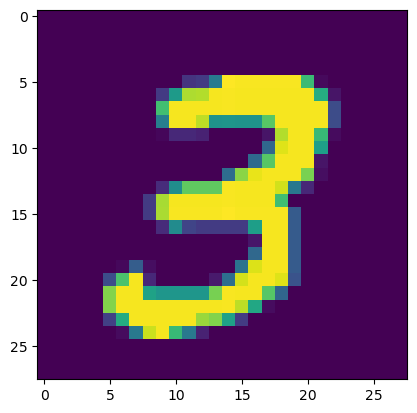

In [57]:
plt.imshow(image_resize)
plt.show()

In [58]:
image_resize.shape

(28, 28)

In [59]:
image_resize = image_resize/255

In [60]:
type(image_resize)

numpy.ndarray

In [61]:
image_reshaped = np.reshape(image_resize, [1, 28, 28])

In [62]:
input_prediction = model.predict(image_reshaped)
print(input_prediction)

1/1 [==============================] - 0s 14ms/step
[[7.4363440e-09 3.9311656e-01 2.8941424e-05 1.0000000e+00 2.6163640e-09
  9.6363044e-01 1.1256717e-18 3.7109567e-06 3.0990885e-04 9.2332458e-01]]


In [63]:
input_prediction_label = np.argmax(input_prediction)

In [64]:
print(input_prediction_label)

3
